In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [6]:
a=df['horsepower'].mode()[0]
df['horsepower'].fillna(a,inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

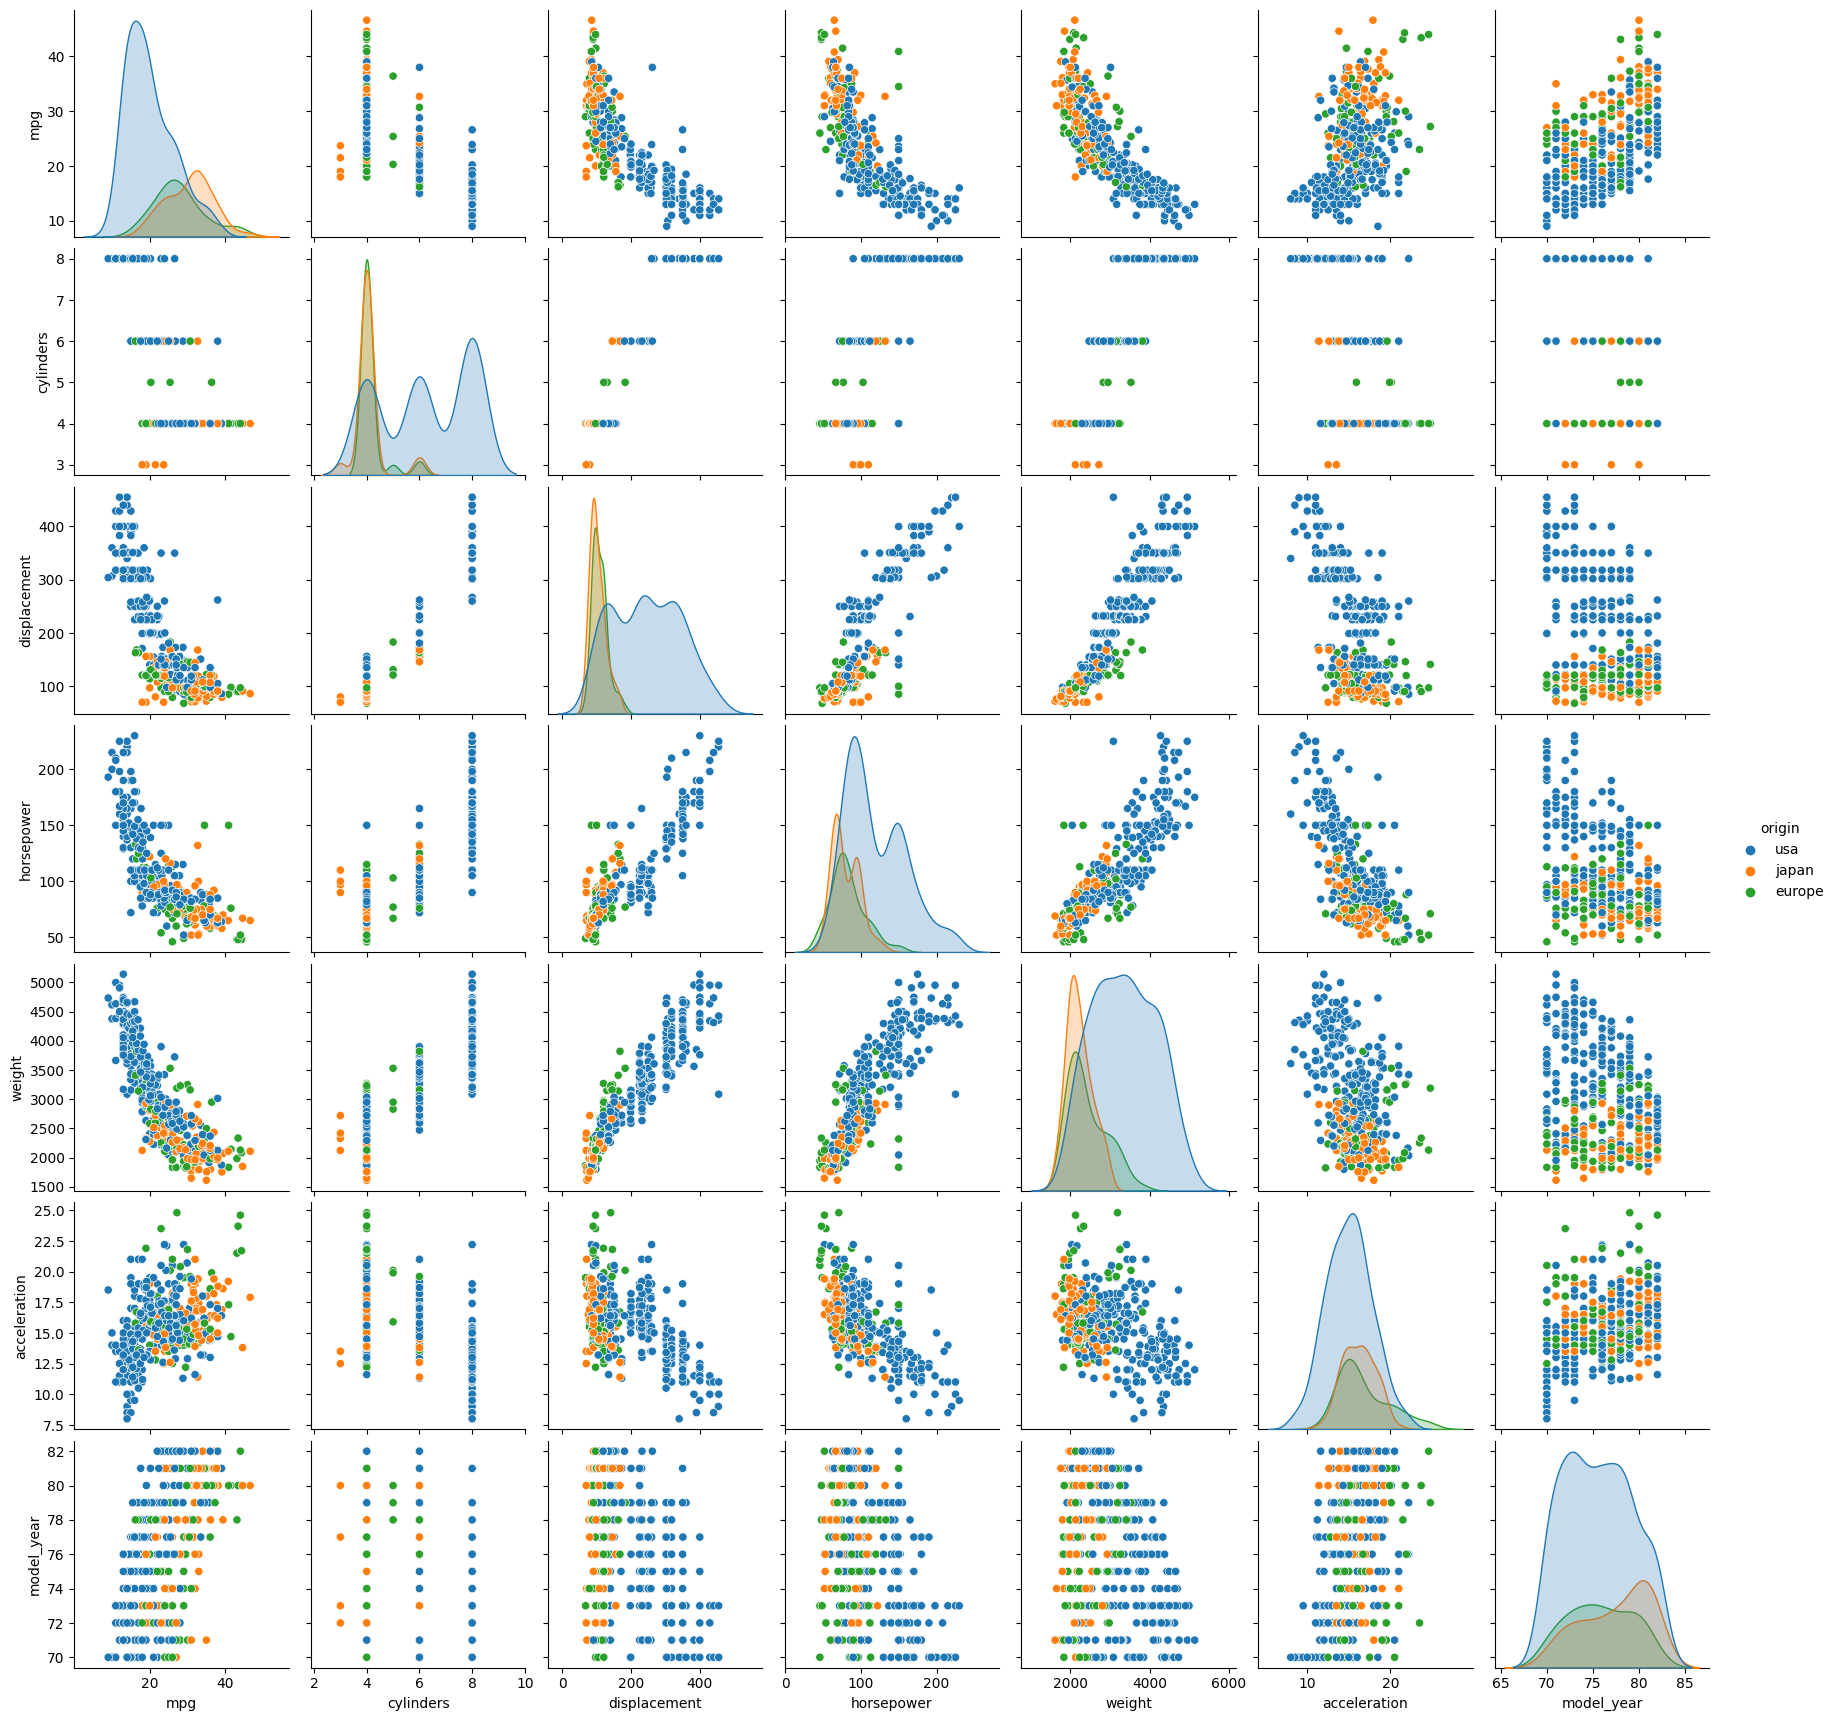

In [8]:
sns.pairplot(df,hue='origin')

C:\Users\aksha\AppData\Local\Temp\ipykernel_17648\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

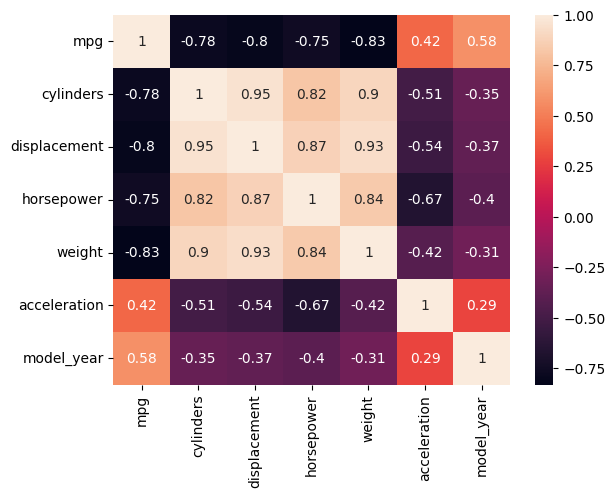

In [13]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [10]:
df['origin']=df['origin'].replace({'usa':0,'japan':1,'europe':2})

In [11]:
df['origin'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,0,ford torino


<Axes: xlabel='horsepower', ylabel='mpg'>

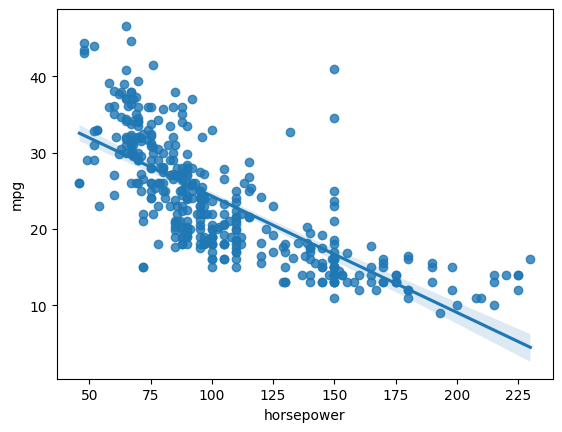

In [13]:
sns.regplot(x='horsepower',y='mpg',data=df)

<Axes: xlabel='model_year', ylabel='mpg'>

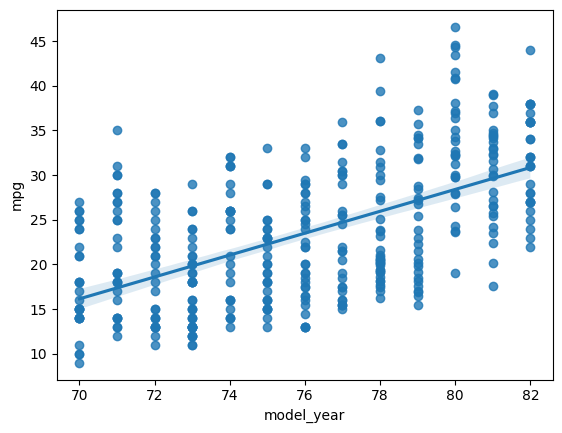

In [14]:
sns.regplot(x='model_year',y='mpg',data=df)

In [15]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['labeled_year']=label.fit_transform(df['model_year'])


In [17]:
x

NameError: name 'x' is not defined

In [ ]:
df['labeled_year'].unique()

<Axes: xlabel='labeled_year', ylabel='mpg'>

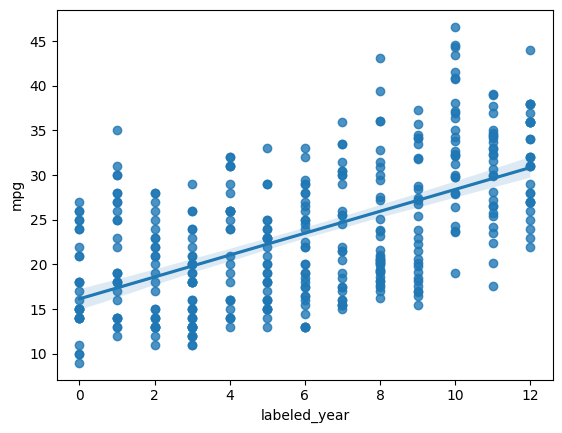

In [18]:
sns.regplot(x='labeled_year',y='mpg',data=df)

In [20]:
X=df.drop(['mpg','name','model_year'],axis=1)
y=df['mpg']

In [21]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
0,8,307.0,130.0,3504,12.0,0,0
1,8,350.0,165.0,3693,11.5,0,0
2,8,318.0,150.0,3436,11.0,0,0
3,8,304.0,150.0,3433,12.0,0,0
4,8,302.0,140.0,3449,10.5,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalar=StandardScaler()
scalar.fit_transform(X,y)

array([[ 1.49819126,  1.0906037 ,  0.64442632, ..., -1.29549834,
        -0.71082544, -1.62742629],
       [ 1.49819126,  1.5035143 ,  1.55228015, ..., -1.47703779,
        -0.71082544, -1.62742629],
       [ 1.49819126,  1.19623199,  1.16319993, ..., -1.65857724,
        -0.71082544, -1.62742629],
       ...,
       [-0.85632057, -0.56103873, -0.54875299, ..., -1.4407299 ,
        -0.71082544,  1.62198339],
       [-0.85632057, -0.70507731, -0.6784464 , ...,  1.10082237,
        -0.71082544,  1.62198339],
       [-0.85632057, -0.71467988, -0.60063036, ...,  1.39128549,
        -0.71082544,  1.62198339]])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<Axes: >

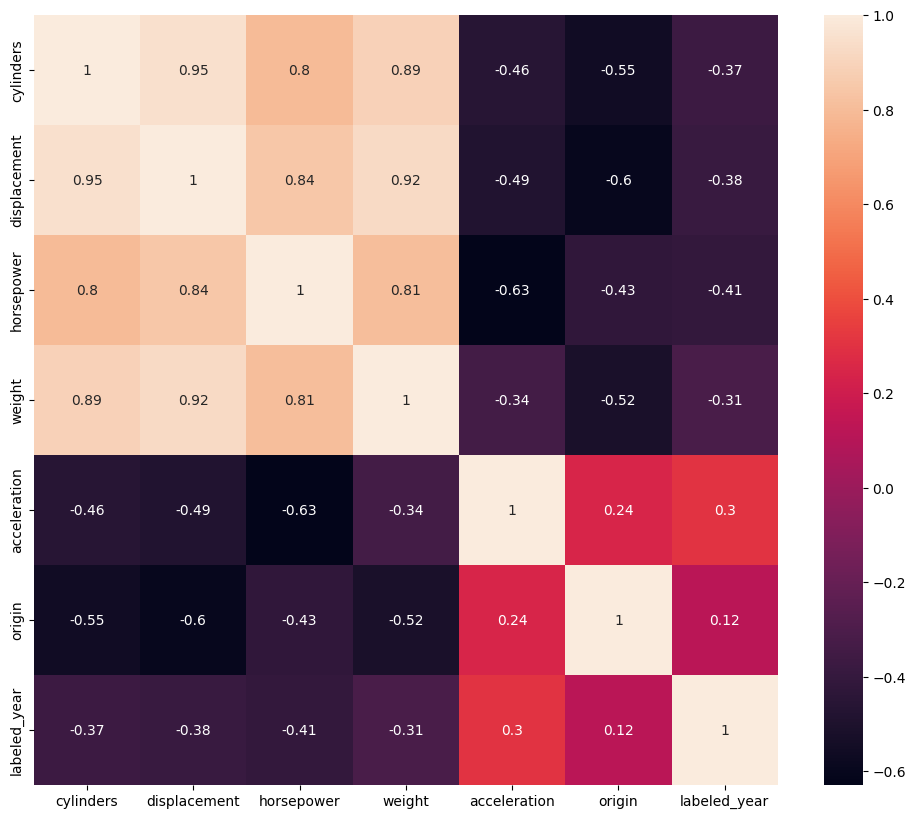

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [26]:
def correlation(dataset,threshold):
    col_corr=set() # set of all  the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # wheather this correlation coefficient value is greater than our defined value
                colname=corr_matrix.columns[i]#store that column name
                col_corr.add(colname)#add that column name to set to avoid duplicates
    return col_corr

In [28]:
corr=correlation(X_train,0.9)
corr

{'displacement', 'weight'}

In [29]:
X_train.drop(corr,inplace=True,axis=1)
X_test.drop(corr,inplace=True,axis=1)

<Axes: >

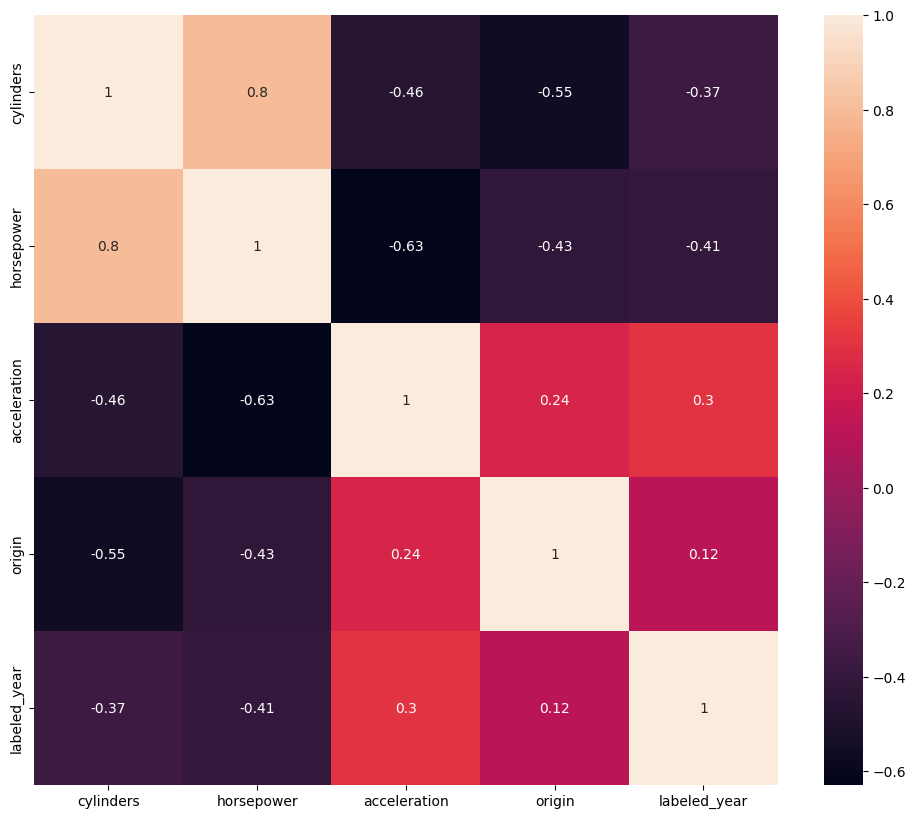

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [54]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
157,8,350.0,145.0,4440,14.0,0,5
109,4,140.0,72.0,2401,19.5,0,3
17,6,200.0,85.0,2587,16.0,0,0
253,6,200.0,95.0,3155,18.2,0,8
24,6,199.0,90.0,2648,15.0,0,0


In [31]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [32]:
pred=linear.predict(X_test)

In [33]:
metrics.r2_score(y_test,pred)

0.7777011591811601

In [34]:
metrics.r2_score(pred,y_test)

0.7613024088991966

In [35]:
metrics.mean_squared_error(y_test,pred)

12.758033665512224

In [36]:
metrics.mean_absolute_error(y_test,pred)

2.845443756729002

In [63]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
198,4,91.0,53.0,1795,17.4,1,6
396,4,120.0,79.0,2625,18.6,0,12
33,6,232.0,100.0,2634,13.0,0,1
208,8,318.0,150.0,3940,13.2,0,6
93,8,318.0,150.0,4237,14.5,0,3


In [64]:
linear.predict([8,307.0,130.0,3504,12.0,0,0])

E:\BROCAMP\WEEK 10\WEEK-10\ds1venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[   8.  307.  130. 3504.   12.    0.    0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [105]:
test=pd.read_csv('carpred.csv')

In [106]:
test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307,130,3504,12.0,70,usa
1,8,350,165,3693,11.5,70,usa
2,8,318,150,3436,11.0,70,usa
3,8,304,150,3433,12.0,70,usa
4,8,302,140,3449,10.5,70,usa


In [107]:
test.replace({'usa':0},inplace=True)
test['labeled_year']=label.fit_transform(test['model_year'])

In [108]:
test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,labeled_year
0,8,307,130,3504,12.0,70,0,0
1,8,350,165,3693,11.5,70,0,0
2,8,318,150,3436,11.0,70,0,0
3,8,304,150,3433,12.0,70,0,0
4,8,302,140,3449,10.5,70,0,0


In [109]:
test.drop(['model_year'],axis=1,inplace=True)

In [110]:
test

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
0,8,307,130,3504,12.0,0,0
1,8,350,165,3693,11.5,0,0
2,8,318,150,3436,11.0,0,0
3,8,304,150,3433,12.0,0,0
4,8,302,140,3449,10.5,0,0


In [111]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
198,4,91.0,53.0,1795,17.4,1,6
396,4,120.0,79.0,2625,18.6,0,12
33,6,232.0,100.0,2634,13.0,0,1
208,8,318.0,150.0,3940,13.2,0,6
93,8,318.0,150.0,4237,14.5,0,3


In [84]:
x=linear.predict(test)

In [86]:
y=df['mpg'].head()
y

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

<Axes: ylabel='mpg'>

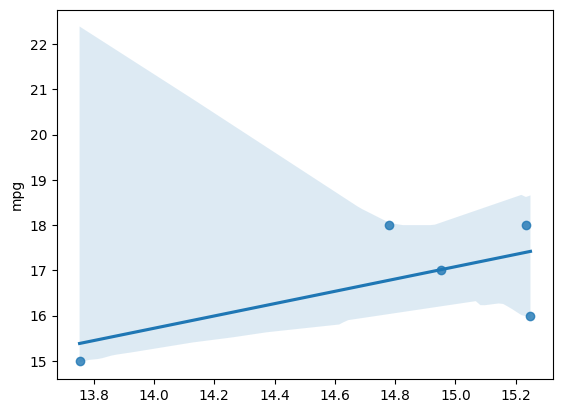

In [88]:
sns.regplot(x=x,y=y)

In [89]:
pd.DataFrame(x,y)

,0
mpg,
18.0,14.780823
15.0,13.753117
18.0,15.233041
16.0,15.249129
17.0,14.951598


In [91]:
X1=df.drop(['mpg','model_year','acceleration','origin','name','labeled_year'],axis=1)
X1.head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130.0,3504
1,8,350.0,165.0,3693
2,8,318.0,150.0,3436
3,8,304.0,150.0,3433
4,8,302.0,140.0,3449


In [93]:
y1=df['mpg']
y1.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [97]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [98]:
linear1=LinearRegression()

In [99]:
linear1.fit(X1_train,y1_train)

LinearRegression()

In [100]:
pred1=linear1.predict(X1_test)

In [101]:
metrics.r2_score(pred1,y1_test)

0.6912541213869756

In [103]:
metrics.r2_score(y1_test,pred1)

0.719716168918614

In [112]:
test.head()

,cylinders,displacement,horsepower,weight,acceleration,origin,labeled_year
0,8,307,130,3504,12.0,0,0
1,8,350,165,3693,11.5,0,0
2,8,318,150,3436,11.0,0,0
3,8,304,150,3433,12.0,0,0
4,8,302,140,3449,10.5,0,0


In [115]:
test.drop(['acceleration','origin','labeled_year'],inplace=True,axis=1)

In [116]:
test

,cylinders,displacement,horsepower,weight
0,8,307,130,3504
1,8,350,165,3693
2,8,318,150,3436
3,8,304,150,3433
4,8,302,140,3449


In [113]:
X1.head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130.0,3504
1,8,350.0,165.0,3693
2,8,318.0,150.0,3436
3,8,304.0,150.0,3433
4,8,302.0,140.0,3449


In [118]:
x1pred=linear1.predict(test)
pd.DataFrame(x1pred,df['mpg'].head())

,0
mpg,
18.0,18.438149
15.0,15.863790
18.0,18.100438
16.0,18.349743
17.0,18.552862


<Axes: ylabel='mpg'>

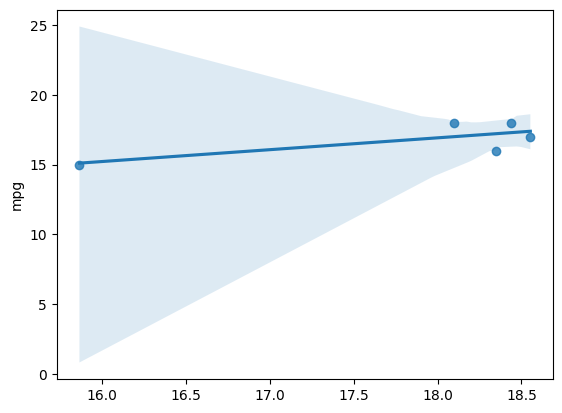

In [120]:
sns.regplot(x=x1pred,y=df['mpg'].head())

In [121]:
metrics.mean_squared_error(y1_test,pred1)

16.08587134176369

<Axes: ylabel='mpg'>

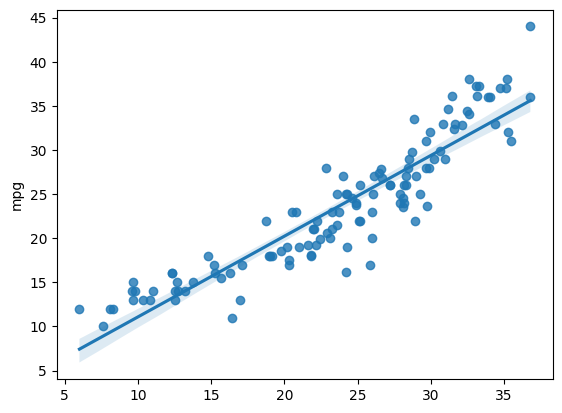

In [122]:
sns.regplot(x=pred,y=y_test)

<Axes: ylabel='mpg'>

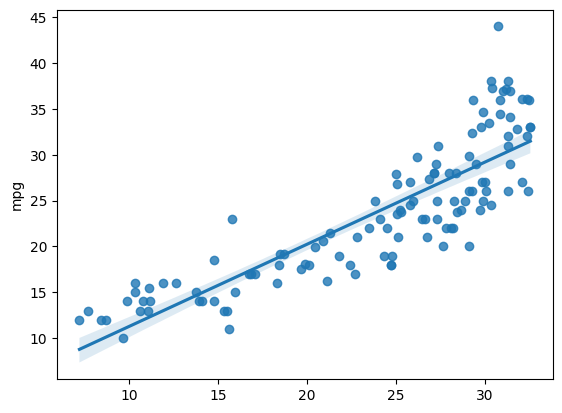

In [124]:
sns.regplot(x=pred1,y=y1_test)